<center>
<h1><b>DoS Attack Detection</b></h1>
<h3><b>Project Domain: DoS Attack Detection using Machine Learning Approach</b></h3>
<br>

<h3>CSE3502 - Information Security Management
<br>J-Component</h3>

<h3>Team Details:</h3>
<table>
<tr><td><h4><b>Name</b></h4><td><td><h4><b>Registration Number</b></h4><td></tr>
<tr><td><h4>Soumyaraj Roy</h4><td><td><h4>19BCE0200</h4><td></tr>
<tr><td><h4>Kaustubh Dwivedi</h4><td><td><h4>19BCE0249</h4><td></tr>
<tr><td><h4>Nishma Avalon Rebello</h4><td><td><h4>19BCE0253</h4><td></tr>
<tr><td><h4>Saatvik Sharma</h4><td><td><h4>19BCE0289</h4><td></tr>
<tr><td><h4>Tanmay Misra</h4><td><td><h4>19BCE0310</h4><td></tr>
</table>
</center>
<br>

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Dataset - Analysis & Pre-processing

The dataset that we have used for this project is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining.

The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" (normal) connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

We have downloaded the dataset from KDD Cup website. Link to dataset: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [3]:
# List of all column names in the dataset
columns = ['duration', 'protocol_type', 'service',
           'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in',
           'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count',
           'serror_rate', 'srv_serror_rate', 'rerror_rate',
           'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
           'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']

In [4]:
# Read dataset and print no.of rows and columns
kdd_data = pd.read_csv('train.csv', names=columns)
print('Number of rows in training: {}\nNumber of columns in training: {}'.format(kdd_data.shape[0], kdd_data.shape[1]))

Number of rows in training: 494021
Number of columns in training: 42


The dataset consists of 494021 records of connections including a variety of intrusion attacks simulated in a miliatry network environment. It includes dump data from 7 weeks of network traffic.

Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.

This dataset can be used to train a simple machine learning model to classify whether an incoming connection request is malicious or not. Such a model can then be used in intrusion detection systems to block "bad" connections.

In [5]:
kdd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
#different types of target present in train
kdd_data['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

Attacks fall into four main categories:


1.   **DoS:** denial-of-service, e.g. syn flood
2.   **R2L:** unauthorized acces from a remote machine, e.g. guessing password
3.   **U2R:** unautorized acces to local superuser (root) privileges, e.g. various "buffer overflow" attacks
4.   **Probing:** surveillance and other probing, e.g. port scanning

<img src="https://miro.medium.com/max/875/1*H0a2ZpZ3sisTiS0-MHPlCw.jpeg" width=800px>

Based on the table shown above, we have mapped the different attack types to the respective attack class.

In [7]:
# Different types of attacks and their attack class
attacks_types = {'normal': 'normal',
                 'back': 'dos',
                 'buffer_overflow': 'u2r',
                 'ftp_write': 'r2l',
                 'guess_passwd': 'r2l',
                 'imap': 'r2l',
                 'ipsweep': 'probe',
                 'land': 'dos',
                 'loadmodule': 'u2r',
                 'multihop': 'r2l',
                 'neptune': 'dos',
                 'nmap': 'probe',
                 'perl': 'u2r',
                 'phf': 'r2l',
                 'pod': 'dos',
                 'portsweep': 'probe',
                 'rootkit': 'u2r',
                 'satan': 'probe',
                 'smurf': 'dos',
                 'spy': 'r2l',
                 'teardrop': 'dos',
                 'warezclient': 'r2l',
                 'warezmaster': 'r2l'}

kdd_data['Attack Class'] = kdd_data.target.apply(lambda r:attacks_types[r[:-1]])
kdd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
kdd_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, we will perform some basic analysis of the data before building the machine learning model.

In [9]:
def bar_graph(feature):
    kdd_data[feature].value_counts().plot(kind="bar")

In [10]:
# No.of instances of each protocol type
kdd_data['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

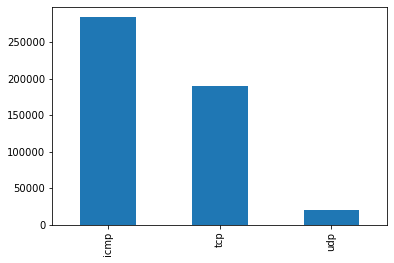

In [11]:
# Bar graph for count of different protocols
bar_graph('protocol_type')

Here, we can see the different number of instances of each protocol type, such as ICMP, UDP and TCP.

There are ~280,000 instances of ICMP packets in the dataset. There are also ~200,000 records TCP packets and ~20,000 instances of UDP packets.

In [12]:
# No.of instances of each type of attack
kdd_data['Attack Class'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Class, dtype: int64

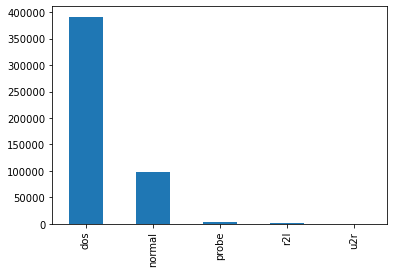

In [13]:
# Bar graph for count of different types of attacks
bar_graph('Attack Class')

Out of the 494,021 instances of network connections, ~97,000 are normal connections. There are ~400,000 instancesof connections where DoS attack has occurred. Similarly, there are 4107 probe attacks, 1126 R2L attacks and 52 U2R attcks.

Here, we have plotted the correlation heatmap for the dataset to display the correlation between each pair of features of the dataset.

C:\Users\kaust\AppData\Local\Temp/ipykernel_22724/3618789965.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  kdd_data = kdd_data.dropna('columns')


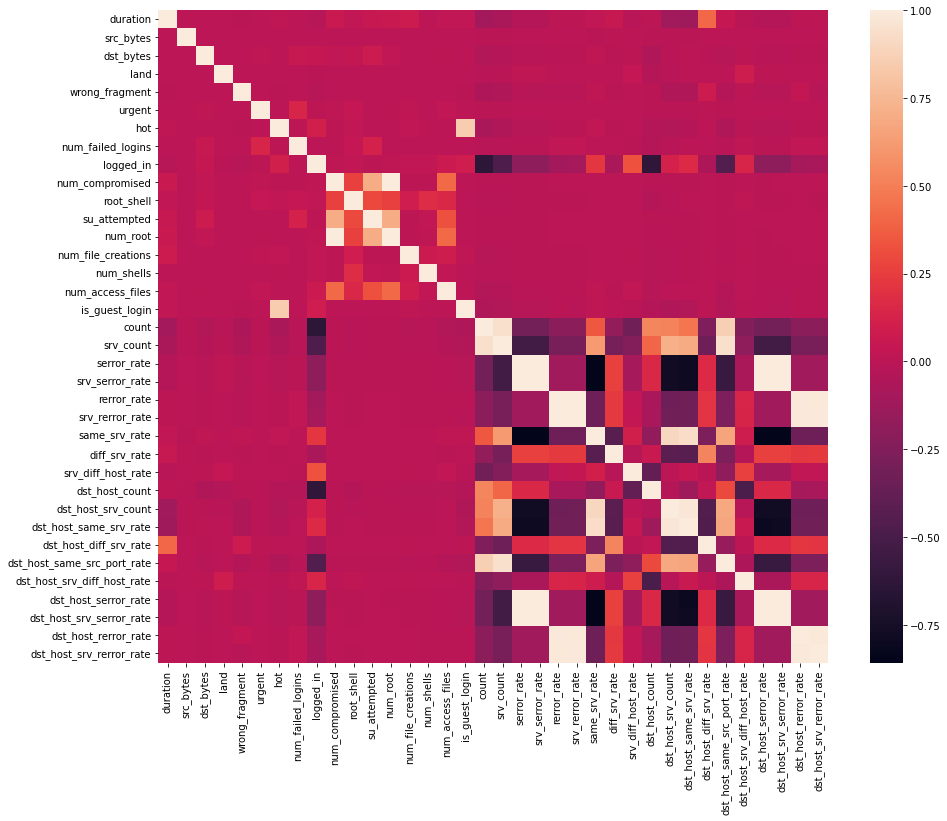

In [14]:
# Correlation matrix
kdd_data = kdd_data.dropna('columns')
kdd_data = kdd_data[[col for col in kdd_data if kdd_data[col].nunique() > 1]]
corr = kdd_data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

Some features are highly correlated with each other (~1 correlation score). Such features will not improve the performance of the machine learning model and should be ignored to minimize training and testing time.

In [15]:
kdd_data.shape

(494021, 41)

In [16]:
# List of columns to drop because of high correlation
drop_cols = ['num_root',
             'srv_serror_rate',
             'srv_rerror_rate',
             'dst_host_srv_serror_rate',
             'dst_host_serror_rate',
             'dst_host_rerror_rate',
             'dst_host_srv_rerror_rate',
             'dst_host_same_srv_rate']

kdd_data.drop(drop_cols, axis=1, inplace=True)
kdd_data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.00,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.00,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.00,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.00,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.00,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.00,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.0,1,69,0.0,1.00,0.04,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.0,11,79,0.0,0.09,0.04,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.0,8,89,0.0,0.12,0.04,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.0,8,99,0.0,0.12,0.05,normal.,normal


In [17]:
kdd_data.shape

(494021, 33)

In [18]:
# Mapping protocol type
pmap = {'icmp':0, 'tcp':1, 'udp':2}
kdd_data['protocol_type'] = kdd_data['protocol_type'].map(pmap)

# Mapping flag
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5 , 'S1':6 , 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
kdd_data['flag'] = kdd_data['flag'].map(fmap)

In [19]:
kdd_data.drop('service', axis=1, inplace=True)

In [20]:
kdd_data.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Class'],
      dtype='object')

In [21]:
kdd_data.shape

(494021, 32)

# Model Building

In the final part of the project, we have built and trained 4 different machine learning classifiers to classify whether an incoming connection is malicious or normal. We will be selecting the best classifier based on their accuracy scores.

In [22]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Here, we have split the complete dataset into training and testing datasets.

In [23]:
kdd_data.tail()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Class
494016,0,1,0,310,1881,0,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.,normal
494020,0,1,0,219,1234,0,0,0,0,0,...,1.0,0.0,0.14,6,255,0.0,0.17,0.05,normal.,normal


In [24]:
kdd_data = kdd_data.drop(['target'], axis=1)

In [25]:
kdd_data.shape

(494021, 31)

In [26]:
print('Complete dataset:')
print('Number of rows: {}\nNumber of columns: {}'.format(kdd_data.shape[0], kdd_data.shape[1]))

# Target variable and train set
Y = kdd_data[['Attack Class']]
X = kdd_data.drop(['Attack Class'], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print('\nNumber of rows in training set: {}'.format(X_train.shape[0]))
print('Number of rows in validation set: {}'.format(X_test.shape[0]))

Complete dataset:
Number of rows: 494021
Number of columns: 31

Number of rows in training set: 395216
Number of rows in validation set: 98805


## Random Forest Classifier

First, we have built and trained a random forest classifier model with 30 individual classifiers.

In [27]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [28]:
# Initialise Random Forest model
rfc = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=2)

# Model training
train_start_time = time.time()
rf_model = RFECV(rfc, step=1, cv=4)
rf_model.fit(X_train, Y_train.values.ravel())
train_end_time = time.time()
rf_train_time = train_end_time-train_start_time
print('Training time for Random Forest model is {} seconds'.format(rf_train_time))

# Model testing
test_start_time = time.time()
Y_test_pred = rf_model.predict(X_test)
test_end_time = time.time()
rf_test_time = test_end_time-test_start_time
print('Testing time for Random Forest model is {} seconds'.format(rf_test_time))

Training time for Random Forest model is 239.6307611465454 seconds
Testing time for Random Forest model is 0.12200260162353516 seconds


In [29]:
# Training and testing accuracy score
rf_train_acc = round(100*rf_model.score(X_train, Y_train), 4)
rf_test_acc = round(100*rf_model.score(X_test, Y_test), 4)
rf_f1_score = (100*f1_score(Y_test, Y_test_pred, average='weighted'))
print('Training accuracy for Random Forest model is {}%'.format(rf_train_acc))
print('Testing accuracy for Random Forest model is {}%'.format(rf_test_acc))
print('F1 Score for Random Forest Model is {}%'.format(rf_f1_score))

Training accuracy for Random Forest model is 99.6012%
Testing accuracy for Random Forest model is 99.6033%
F1 Score for Random Forest Model is 99.48837009820973%


In [30]:
print("Optimal number of features : %d" % rf_model.n_features_)

Optimal number of features : 20


In [31]:
print(rf_model.ranking_)

[ 1  1  1  1  1  8  1  7  1  4  1  1  6 11  5 10  9  3  1  1  1  2  1  1
  1  1  1  1  1  1]


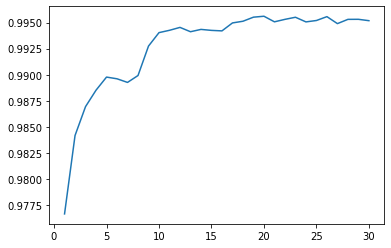

In [32]:
plt.plot(range(1, 31), rf_model.grid_scores_)

#### Confusion Matrix 

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_test_pred)

array([[78217,    65,    10,     0,     0],
       [    1, 19454,     1,     0,     0],
       [   11,    72,   739,     0,     0],
       [    0,   222,     0,     3,     0],
       [    0,    10,     0,     0,     0]], dtype=int64)

## Decision Tree Classifier

Here, we have built and trained a decision tree classifier.

In [110]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [111]:
# Initialise Decision Tree model
dtree_model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Model training
train_start_time = time.time()
dtree_model.fit(X_train, Y_train.values.ravel())
train_end_time = time.time()
dtree_train_time = train_end_time-train_start_time
print('Training time for Decision Tree model is {} seconds'.format(dtree_train_time))

# Model testing
test_start_time = time.time()
Y_test_pred = dtree_model.predict(X_test)
test_end_time = time.time()
dtree_test_time = test_end_time-test_start_time
print('Testing time for Decision Tree model is {} seconds'.format(dtree_test_time))

Training time for Decision Tree model is 0.9729549884796143 seconds
Testing time for Decision Tree model is 0.012001276016235352 seconds


In [112]:
# Training and testing accuracy score
dtree_train_acc = round(100*dtree_model.score(X_train, Y_train), 4)
dtree_test_acc = round(100*dtree_model.score(X_test, Y_test), 4)
dtree_f1_score = (100*f1_score(Y_test, Y_test_pred, average='weighted'))
print('Training accuracy for Decision Tree model is {}%'.format(dtree_train_acc))
print('Testing accuracy for Decision Tree model is {}%'.format(dtree_test_acc))
print('F1 Score for Random Forest Model is {}%'.format(dtree_f1_score))

Training accuracy for Decision Tree model is 99.0555%
Testing accuracy for Decision Tree model is 99.0608%
F1 Score for Random Forest Model is 99.01789528617907%


## Support Vector Machine (SVM)

The third machine learning model that we have trained in a support vector machine (SVM) classifier.

In [98]:
# Import SVC
from sklearn.svm import SVC

In [100]:
# Initialise SVC model
svc_model = SVC(kernel='poly', degree=2, C=0.1, gamma='scale')

# Model training
train_start_time = time.time()
svc_model.fit(X_train, Y_train.values.ravel())
train_end_time = time.time()
svc_train_time = train_end_time-train_start_time
print('Training time for SVM model is {} seconds'.format(svc_train_time))

# Model testing
test_start_time = time.time()
Y_test_pred = svc_model.predict(X_test)
test_end_time = time.time()
svc_test_time = test_end_time-test_start_time
print('Testing time for SVM model is {} seconds'.format(svc_test_time))

Training time for SVM model is 779.1995241641998 seconds
Testing time for SVM model is 25.124690055847168 seconds


In [101]:
# Training and testing accuracy score
svc_train_acc = round(100*svc_model.score(X_train, Y_train), 4)
svc_test_acc = round(100*svc_model.score(X_test, Y_test), 4)
svc_f1_score = (100*f1_score(Y_test, Y_test_pred, average='weighted'))
print('Training accuracy for SVM model is {}%'.format(svc_train_acc))
print('Testing accuracy for SVM model is {}%'.format(svc_test_acc))
print('F1 Score for Random Forest Model is {}%'.format(svc_f1_score))

Training accuracy for SVM model is 99.3378%
Testing accuracy for SVM model is 99.3553%
F1 Score for Random Forest Model is 99.35224832318983%


## Logistic Regression

The final model that we have trained is a logistic regression model.

In [117]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [118]:
# Initialise Logistic Regression model
logreg_model = LogisticRegression(max_iter=12000)

# Model training
train_start_time = time.time()
logreg_model.fit(X_train, Y_train.values.ravel())
train_end_time = time.time()
logreg_train_time = train_end_time-train_start_time
print('Training time for Logistic Regression model is {} seconds'.format(logreg_train_time))

# Model testing
test_start_time = time.time()
Y_test_pred = logreg_model.predict(X_test)
test_end_time = time.time()
logreg_test_time = test_end_time-test_start_time
print('Testing time for Logistic Regression model is {} seconds'.format(logreg_test_time))

Training time for Logistic Regression model is 46.68308997154236 seconds
Testing time for Logistic Regression model is 0.011002779006958008 seconds


In [119]:
# Training and testing accuracy score
logreg_train_acc = round(100*logreg_model.score(X_train, Y_train), 4)
logreg_test_acc = round(100*logreg_model.score(X_test, Y_test), 4)
logreg_f1_score = (100*f1_score(Y_test, Y_test_pred, average='weighted'))
print('Training accuracy for Logistic Regression model is {}%'.format(logreg_train_acc))
print('Testing accuracy for Logistic regression model is {}%'.format(logreg_test_acc))
print('F1 Score for Random Forest Model is {}%'.format(logreg_f1_score))

Training accuracy for Logistic Regression model is 99.3869%
Testing accuracy for Logistic regression model is 99.3765%
F1 Score for Random Forest Model is 99.3750457112889%


# Creating dataframe and plotting training testing accuracy graph

In [121]:
# Create dataframe to display results
results = {'Training time (sec)': [rf_train_time, dtree_train_time, svc_train_time, logreg_train_time],
           'Testing time (sec)': [rf_test_time, dtree_test_time, svc_test_time, logreg_test_time],
           'Training accuracy (%)': [rf_train_acc, dtree_train_acc, svc_train_acc, logreg_train_acc],
           'Testing accuracy (%)': [rf_test_acc, dtree_test_acc, svc_test_acc, logreg_test_acc],
            'F1 Score (%)' : [rf_f1_score, dtree_f1_score, svc_f1_score, logreg_f1_score]}
results_DF = pd.DataFrame(results, index=['Random Forest', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression'])
results_DF

,Training time (sec),Testing time (sec),Training accuracy (%),Testing accuracy (%),F1 Score (%)
Random Forest,291.384290,0.156031,99.5033,99.5112,99.413848
Decision Tree,0.972955,0.012001,99.0555,99.0608,99.017895
Support Vector Machine,779.199524,25.124690,99.3378,99.3553,99.352248
Logistic Regression,46.683090,0.011003,99.3869,99.3765,99.375046


<AxesSubplot:>

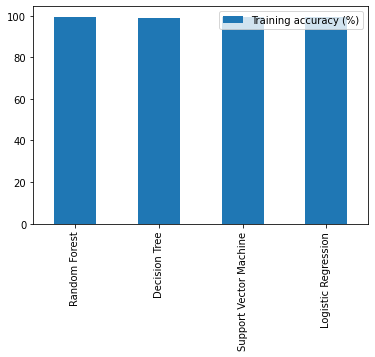

In [122]:
results_DF.plot.bar(y=['Training accuracy (%)'])

<AxesSubplot:>

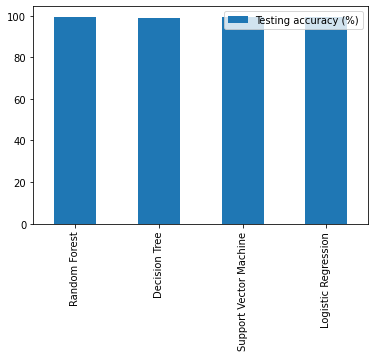

In [123]:
results_DF.plot.bar(y=['Testing accuracy (%)'])

# Conclusion

Finally, we see that the Random Forest model achieves the highest accuracy on both training and tesing datasets.

SVC model is very slow but it has a very high accuracy, as it is very slow so can't be used in real life detection system.

However, the Decision Tree model is the quickest in terms of training and testing time. It also gives fairly high accuracy. Hence, in terms of time and accuracy combined the best model out of the 4 is the Decision Tree model as it achieves high accuracy while also minimizing training and testing time.

While if accuracy is prime focus then the Random Forest Model is to be preferred.

Such a model can be used in intrusion detection systems to make these systems more robust and intelligent in detecting malicious attacks such as Denial of Service attacks.

## Predicting the attack on other test dataset

In [124]:
# reading test data
test_kdd_data = pd.read_csv('test.csv', names=columns)
print('Number of rows in test: {}\nNumber of columns in test: {}'.format(test_kdd_data.shape[0], test_kdd_data.shape[1]))

Number of rows in test: 311079
Number of columns in test: 42


In [125]:
test_kdd_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [126]:
test_kdd_data.shape

(311079, 42)

In [127]:
# the last column of test dataset has NaN values, which we have to predict
test_kdd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,smtp,SF,829,327,0,0,0,0,...,113,0.88,0.25,0.12,0.02,0.0,0.0,0.0,0.0,NaN
1,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,NaN
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,NaN
3,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,NaN
4,0,tcp,ftp_data,SF,19,0,0,0,0,0,...,46,0.19,0.03,0.19,0.04,0.0,0.0,0.0,0.0,NaN


### Preprocessing 

In [128]:
test_kdd_data = test_kdd_data.drop(['target'], axis=1)
test_kdd_data = test_kdd_data.drop(['is_host_login'], axis=1)

In [129]:
test_kdd_data = test_kdd_data.dropna('columns')
test_kdd_data = test_kdd_data[[col for col in test_kdd_data if test_kdd_data[col].nunique() > 1]]

C:\Users\kaust\AppData\Local\Temp/ipykernel_16872/1643074512.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  test_kdd_data = test_kdd_data.dropna('columns')


In [130]:
test_kdd_data.drop(drop_cols, axis=1, inplace=True)
test_kdd_data['protocol_type'] = test_kdd_data['protocol_type'].map(pmap)
test_kdd_data['flag'] = test_kdd_data['flag'].map(fmap)

In [131]:
test_kdd_data.drop('service', axis=1, inplace=True)

In [132]:
test_kdd_data = sc.fit_transform(test_kdd_data)

In [133]:
test_kdd_data.shape

(311079, 30)

### As Random Forest Model is giving the heighest accurracy we will use that only for predicting our test dataset

In [134]:
label_pred = rf_model.predict(test_kdd_data)

In [135]:
label_pred

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [136]:
predicted_classes = label_pred.tolist()

### Appending the predicted class after prediction

In [137]:
predicted_test_data = pd.read_csv('test.csv', names=columns)

In [138]:
predicted_test_data = predicted_test_data.drop(['target'], axis=1)

In [139]:
predicted_test_data['Predicted Attack Class'] = label_pred.tolist()

In [140]:
predicted_test_data['Predicted Attack Class'].value_counts()

dos       222351
normal     85906
probe       2816
r2l            6
Name: Predicted Attack Class, dtype: int64

In [141]:
predicted_test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Predicted Attack Class
0,0,tcp,smtp,SF,829,327,0,0,0,0,...,113,0.88,0.25,0.12,0.02,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,ftp_data,SF,19,0,0,0,0,0,...,46,0.19,0.03,0.19,0.04,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311074,0,tcp,http,SF,291,268,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal
311075,0,tcp,http,SF,211,1447,0,0,0,0,...,94,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal
311076,0,tcp,http,SF,206,15816,0,0,0,0,...,104,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal
311077,0,tcp,http,SF,211,172,0,0,0,0,...,114,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal


# Thank You